Introduction

Preliminary exploratory data analysis:

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Training Dataset

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)

`summarise()` ungrouping output (override with `.groups` argument)



target_class,n,percentage
<fct>,<int>,<dbl>
0,11375,90.796616
1,1153,9.203384


Warning message:
“Removed 1735 rows containing missing values (geom_point).”


Mean.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,target_class
<dbl>,<dbl>,<fct>
121.15625,0.3754847,0
76.96875,0.7128979,0
130.58594,0.1334083,0
⋮,⋮,⋮
116.0312,0.66345569,0
135.6641,-0.08994031,0
120.7266,0.34617808,0


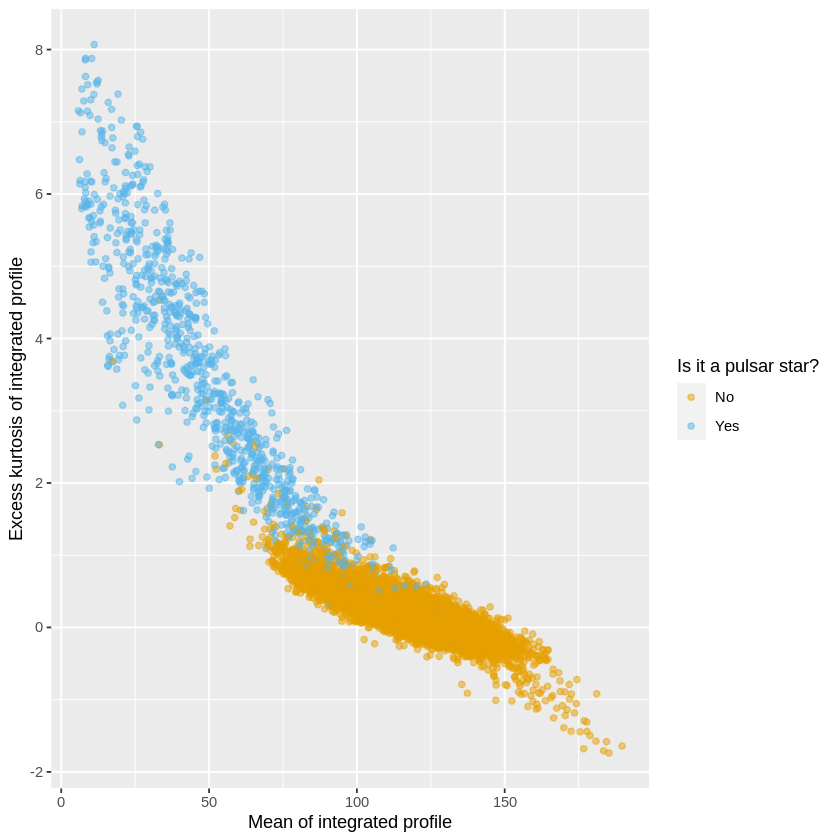

In [29]:
pulsar_train <- read_csv("data/pulsar_data_train.csv") %>%
    mutate(target_class = as.factor(target_class)) 
    
colnames(pulsar_train) <- make.names(colnames(pulsar_train))

# training_set <- pulsar_train %>%
#     select(Mean.of.the.integrated.profile,
#            Excess.kurtosis.of.the.integrated.profile,
#            target_class)

num_obs <- nrow(pulsar_train)
pulsar_train %>%
  group_by(target_class) %>%
  summarize(n = n(),
            percentage = n() / num_obs * 100)

cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999")

ggplot(pulsar_train, aes(x = Mean.of.the.integrated.profile, 
                         y = Excess.kurtosis.of.the.integrated.profile, 
                         color = target_class)) +
    geom_point(alpha = 0.5) + 
    labs(x = "Mean of integrated profile", y = "Excess kurtosis of integrated profile", color = "Is it a pulsar star?") +
    scale_color_manual(labels = c("No", "Yes"), values = cbPalette)


training_set

Testing Dataset

In [5]:
pulsar_test <- read_csv("data/pulsar_data_test.csv") %>%
    select(-target_class)
    
colnames(pulsar_test) <- make.names(colnames(pulsar_test))

pulsar_test

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_logical()
)



Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
116.90625,48.92060,0.1860463,-0.1298151,3.037625,17.73710,8.122621,78.81340
75.58594,34.38625,2.0254984,8.6529130,3.765050,21.89705,7.048189,55.87879
103.27344,46.99663,0.5042952,0.8210883,2.244983,15.62257,9.330498,105.13494
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
136.1719,48.92439,NA,0.06322721,2.810201,18.69523,7.848577,69.38898
106.5000,49.06612,0.2457423,0.14037716,2.331104,15.41757,9.008041,100.36762
110.6797,38.25264,0.4599371,1.69068874,4.434783,22.20179,5.939747,39.78137


Methods:

Expected outcomes and significance: